In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv('/Users/pawelmozaryn/Desktop/4 semestr/wstep do explo/steam_games.csv')

**1**

In [6]:
print("Rozmiar zbioru:", df.shape)
print("\n Liczba braków danych:")
print(df.isnull().sum())

print("\n Typy zmiennych:",)
print(df.dtypes)

Rozmiar zbioru: (71429, 21)

 Liczba braków danych:
steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64

 Typy zmiennych:
steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_content      object
total_reviews       

Zbiór danych ma wymiary 71429 obserwacji x 21 kolumn, zmienne maja ponizsze typy: int64, object, bool, float64. \
Nie wystepuja braki danych \
Rodzaje zmiennych: \
-steam_apid, name, developers, categories, genres, platforms, additional content - jakościowe nominalne, \
-required_age, n_achievements, total_reviews, total_positive, total_negative - ilościowe zliczeniowe, \
-review_score, positive_percentual - ilosciowe przedzialowe, \
-price_initial (USD)  - ilosciowa ilorazowa.

In [7]:
df.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99


**2**

In [9]:
print("\nStatystyki opisowe dla zmiennych numerycznych:")
print(df.describe())

print("\nStatystyki opisowe dla zmiennych kategorycznych:")
print(df.select_dtypes(include='object').describe())


Statystyki opisowe dla zmiennych numerycznych:
        steam_appid  required_age  n_achievements  total_reviews  \
count  7.142900e+04  71429.000000    71429.000000   7.142900e+04   
mean   1.613700e+06      2.573227       16.079478   4.102497e+02   
std    8.625559e+05     13.591997      138.084319   8.389934e+03   
min    7.300000e+02      0.000000        0.000000   0.000000e+00   
25%    9.296400e+05      0.000000        0.000000   0.000000e+00   
50%    1.533470e+06      0.000000        0.000000   2.000000e+00   
75%    2.383530e+06      0.000000       16.000000   1.900000e+01   
max    3.430140e+06     97.000000     9821.000000   1.279700e+06   

       total_positive  total_negative  review_score  positive_percentual  \
count    7.142900e+04    71429.000000  71429.000000         71429.000000   
mean     3.602238e+02       50.025886      2.192849            46.113290   
std      7.409672e+03     1171.055349      3.175885            41.961702   
min      0.000000e+00        0.0000

Wnioski ze statystyk dla zmiennych kategorycznych;\
Mniej wiecej 50k deweloperow odpowiada za 70k gier dostępnych na Steamie, liczba wydawstw jest zblizona do liczny developerów\
Jest a 2373 róznych rodzajów gier!\
Wnioski ze statystyk dla zmiennych numerycznych;\
Znaczna wiekszość gier nie posiada zadnego ograniczenia wiekowego, az 75% mozna kupic mając jedynie 10 dolarów, 25% najtańszych\
mozna sciągnąć za darmo. Gry zbierają średnio po 400 opinii, ale liczba ta odchyla się standardowo o 8 000, zatem nie jest to zadna norma





**3**

In [12]:
df1 = df.groupby('is_free')[[
    'total_reviews', "positive_percentual", "metacritic"]].agg(['mean', 'std'])
print(df1)

        total_reviews               positive_percentual            metacritic  \
                 mean           std                mean        std       mean   
is_free                                                                         
False      443.806415   7312.883282            50.80239  41.202609   2.885998   
True       192.662196  13417.099390            15.70833  33.214497   0.545159   

                    
               std  
is_free             
False    14.364427  
True      6.322936  


Widzimy, ze darmowe gry zbierają średnio 2 razy mniej recencji, recencje te są na ogół negatywne (jedynie 15% pozytywnych). Zarówno darmowe jak i płatne gry zbierają średnio bardzo negatywne opinie na stronie Metacritic.com, ale metacritic score gier płatnych jest odrobinę lepszy.

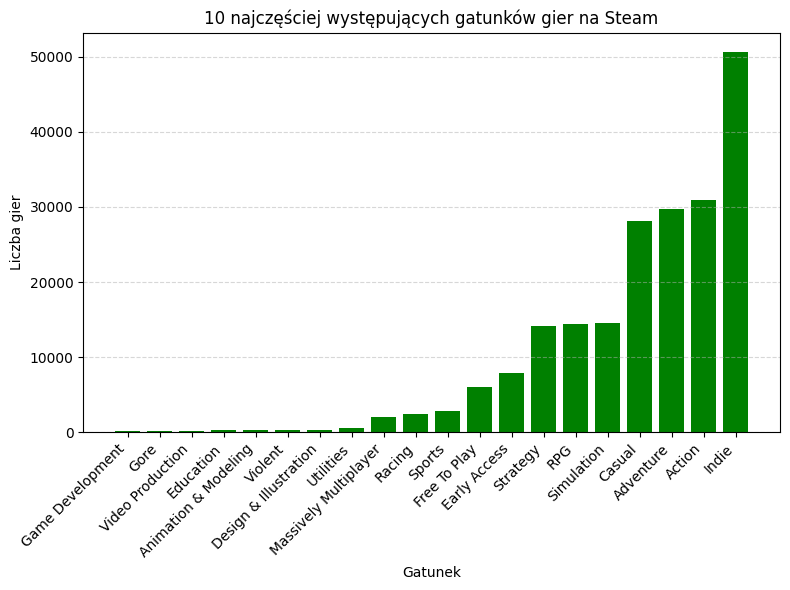

In [21]:


genres_cleaned = (
    df['genres']
    .fillna('')
    .str.replace(r'[\[\]"\']', '', regex=True)
    .apply(lambda x: [g.strip() for g in x.split(',')] if x else [])
)


df['genres_parsed'] = genres_cleaned

genres_exploded = df.explode('genres_parsed')


top_genres = genres_exploded['genres_parsed'].value_counts().head(20)


top_genres = top_genres.sort_values(ascending=True)


plt.figure(figsize=(8, 6))
plt.bar(top_genres.index, top_genres.values, color='green')
plt.title('10 najczęściej występujących gatunków gier na Steam')
plt.xlabel('Gatunek')
plt.ylabel('Liczba gier')
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**4**

Jak widzimy dominującym gatunkiem jest Indie. Potem Action, Adventure oraz Casual.\
 Kolejne gatunki są 2 razy mniej liczne od Casual, Adventure i Action, a od indie a 3 razy\
 Co ciekawe gier RPG, Strategy i Simulation jest mniej wiecej tyle samo, co mozna rowniez powiedziec o Action, Adventure oraz Casual
 

**5**

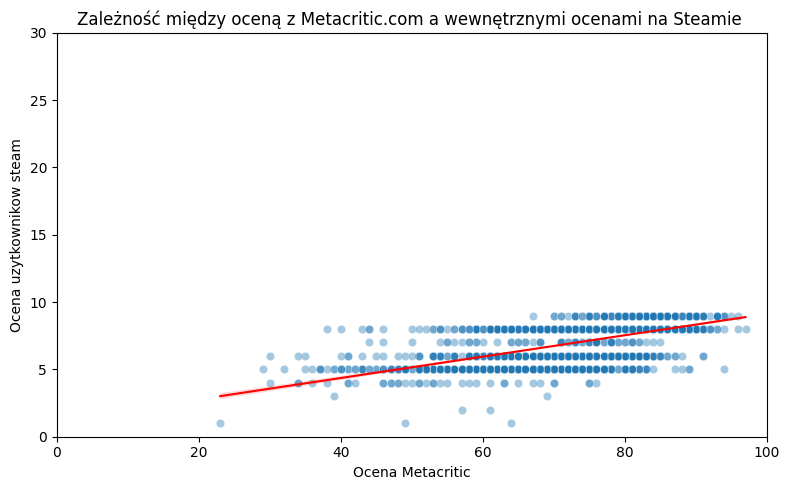

In [ ]:
df_plot = df.copy()

df_plot['review_score'] = df_plot['review_score'].astype(float)
df_plot['metacritic']    = df_plot['metacritic'].astype(float)

df_plot = df_plot[(df_plot['review_score'] > 0) & (df_plot['review_score'] < 100)]
df_plot = df_plot[(df_plot['metacritic'] > 0)    & (df_plot['metacritic'] < 100)]

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='metacritic',
    y='review_score',
    alpha=0.4
)
sns.regplot(
    data=df_plot,
    x='metacritic',
    y='review_score',
    scatter=False,
    line_kws={'color': 'red', 'lw': 1.5}
)

plt.title("Zależność między oceną z Metacritic.com a wewnętrznymi ocenami na Steamie, bez oceny zero ")
plt.xlabel("Ocena Metacritic")
plt.ylabel("Ocena uzytkownikow steam")
plt.xlim(0, 100)
plt.ylim(0, 30)
plt.tight_layout()
plt.show()


Jak widać zalezność między ocenami z Metacritica a ocenami wewnetrznymi jest mniej więcej liniowa i rosnąca,\
 czyli często wysoka nota na Metacritic koreluje z wysoką notą na Steamie. Wykres obcięty jest do\
 gier o niezerowej ocenie, bo jak widzimy ze statystyk opisowych znaczna wiekszosc ma ocenę właśnie zero.\
  Spośród niezerowo ocenionych gier wiekszosc znajduje się w zbiorze [5,10] x [45, 80]

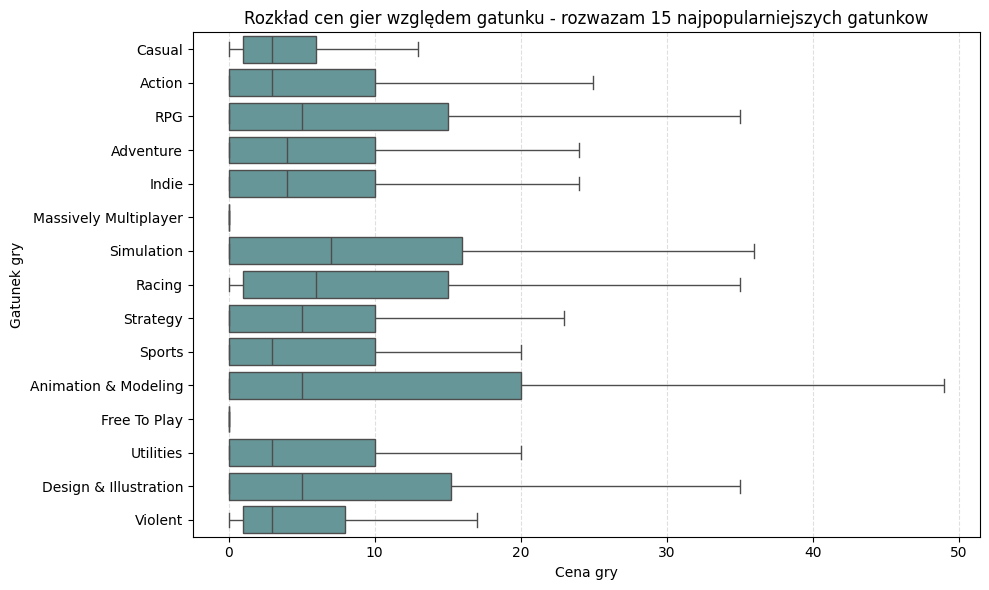

In [32]:
df['main_genre'] = df['genres'].fillna('').str.replace(r'[\[\]\'\"]', '', regex=True)
df['main_genre'] = df['main_genre'].apply(lambda x: x.split(',')[0].strip() if x else None)
top15 = df['main_genre'].value_counts().head(15).index
filtered = df[df['main_genre'].isin(top15)]
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered,
    y='main_genre',
    x='price_initial (USD)',
    showfliers=False,
    color='cadetblue')
plt.xlabel('Cena gry')
plt.ylabel('Gatunek gry')
plt.title('Rozkład cen gier względem gatunku - rozwazam 15 najpopularniejszych gatunkow')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Jak widzimy gry średnio kosztują mniej więcej 5 dolarów, niezaleznie od gatunku.\
Za 15 dolarów mozna kupic 75% wszystkich gier wszystkich gatunków\
Gry typu "Simulation są nie tylko srednio najdrozsze, ale nie mają najdrozszych wartosci odstających - mają je programy do modelingu i animacji